## **ML LAB 10 : Eigenfaces_PCA_SVM**

In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
faces.data.shape

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

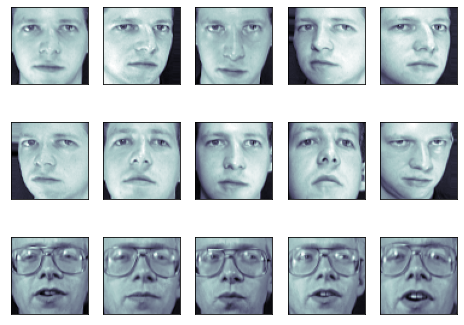

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
faces.target, random_state=0)
print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)

PCA(n_components=150, whiten=True)

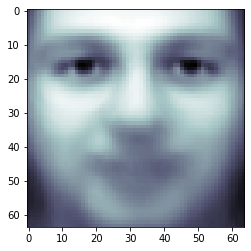

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

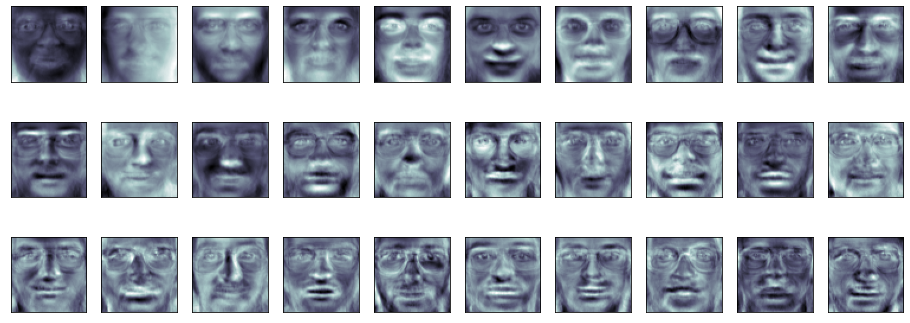

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
  ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
  ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 150)


## Doing the Learning: Naive Bayes Classifier (Support Vector Machines /Decision Tree)

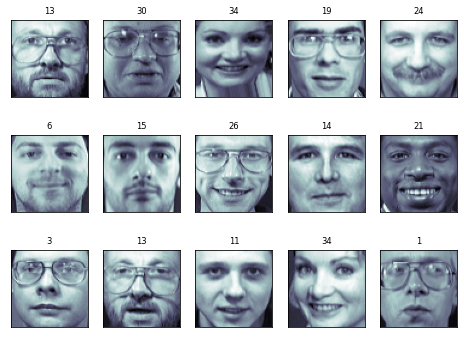

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
import numpy as np
fig = plt.figure(figsize=(8, 6))
for i in range(15):
  ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
  ax.imshow(X_test[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)
  y_pred = gnb.predict(X_test_pca[i, np.newaxis])[0]
  color = ('black' if y_pred == y_test[i] else 'red')
  ax.set_title(y_pred, fontsize='small', color=color)

In [ ]:
from sklearn import metrics
y_pred = gnb.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29         6
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2
           3       0.12      1.00      0.22         1
           4       1.00      1.00      1.00         1
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         3
           9       0.50      1.00      0.67         1
          10       1.00      1.00      1.00         4
          11       0.50      1.00      0.67         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       0.75      1.00      0.86         3
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         6
          18       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [ ]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),

('gnb', GaussianNB())])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[1 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


=================================================================================

## EXERCISE : 

1. Train the Naive Bayes model without PCA and compare the result with PCA + Naive Bayes. Write down your observations.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df = fetch_olivetti_faces()
x = df.data
y = df.target

def gnb_classfier(x_train,y_train,x_test,y_test):
  gnb = GaussianNB()
  gnb.fit(x_train,y_train)
  gnb_pred = gnb.predict(x_test)
  return accuracy_score(y_test,gnb_pred)
  pass
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=150)

print("ACCURACY BEFORE PCA : ")
gnb_accuraccy = gnb_classfier(x_train,y_train,x_test,y_test)
print("Gaussain Naive Bayes accuracy : ",gnb_accuraccy)

pca = PCA(n_components=200,whiten=True)
pca.fit(x_train)
x_train=pca.transform(x_train)
x_test=pca.transform(x_test)

gnb_accuraccy = gnb_classfier(x_train,y_train,x_test,y_test)
print("ACCURACY AFTER PCA : ")
print("Guassain Naive Bayes accuracy : ",gnb_accuraccy)



ACCURACY BEFORE PCA : 
Gaussain Naive Bayes accuracy :  0.79
ACCURACY AFTER PCA : 
Guassain Naive Bayes accuracy :  0.77


=========================================================================================

2. Run PCA on IRIS dataset. Visualise the output in 2 dimensions using to Principal components. Choose different pairs of principal components and note down your observations.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df=load_iris()
x=df.data
y=df.target

def gnb_classify(x_train,x_test,y_train,y_test):
  gnb = GaussianNB()
  gnb.fit(x_train,y_train)
  gnb_pred = gnb.predict(x_test)
  return accuracy_score(y_test,gnb_pred)
  pass

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,
                                                 random_state=108)
print("ACCURACY BEFORE PCA : ")
gnb_accuracy=gnb_classify(x_train,x_test,y_train,y_test)
print("Guassian Naive Bayes accuracy : ",gnb_accuracy)

pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)
print("ACCURACY AFTER PCA : ")
print("x_test : ",x_test)

gnb_accuracy=gnb_classify(x_train,x_test,y_train,y_test)
print("")
print("Gaussian Naive Byaes accuracy : ",gnb_accuracy)

ACCURACY BEFORE PCA : 
Guassian Naive Bayes accuracy :  0.9473684210526315
ACCURACY AFTER PCA : 
x_test :  [[-2.88632985e+00  5.68390602e-02]
 [-2.90776668e+00 -1.54062002e-01]
 [-1.14613546e-01 -6.59266233e-01]
 [ 7.83878556e-02 -4.84171755e-01]
 [-4.72299325e-01 -6.51834215e-01]
 [ 8.94804002e-01 -1.53962294e-01]
 [ 1.01767320e+00 -3.10097457e-01]
 [-2.62898299e+00  3.12918331e-03]
 [ 1.28290440e+00  2.80747767e-01]
 [ 1.19016341e+00  5.20514599e-01]
 [ 2.11357870e+00  4.76098829e-01]
 [ 5.66296682e-02 -1.92075686e-01]
 [-2.97846308e+00  1.52119170e-01]
 [ 1.10231848e+00 -4.07610757e-01]
 [-3.27329324e+00 -2.98260993e-01]
 [-3.50217813e+00 -4.64626184e-01]
 [-2.80739628e+00  5.44610808e-01]
 [-2.81410005e+00  4.72589806e-01]
 [-2.95000111e+00 -6.79558974e-02]
 [ 6.24500333e-01  3.48385759e-01]
 [ 4.38026291e-01  1.70613373e-01]
 [-2.95702624e+00  3.63020233e-01]
 [ 3.12349402e+00  5.53104546e-01]
 [-2.89856892e+00  6.44802016e-01]
 [ 2.15617805e+00  3.79919683e-01]
 [-4.96288600e-02 

=========================================================================================

3. Run PCA + Naive Bayes classifier on IRIS dataset and calculate precision and recall of the system.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

df = load_iris()
x = df.data
y = df.target

def gnb_classify(x_train,x_test,y_train,y_test):
  gnb = GaussianNB()
  gnb.fit(x_train,y_train)
  gnb_pred = gnb.predict(x_test)
  print("REPORT : ")
  print(classification_report(y_test,gnb_pred))
  print("CONFUSION MATRIX : ")
  print(confusion_matrix(y_test,gnb_pred))
  return accuracy_score(y_test,gnb_pred)
  pass

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                 random_state = 100)

pca = PCA(n_components=2)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

gnb_accuracy=gnb_classify(x_train,x_test,y_train,y_test)
print(" ")
print("Gaussian Naive Bayes accuracy : ",gnb_accuracy)

REPORT : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.82      0.90      0.86        10
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

CONFUSION MATRIX : 
[[14  0  0]
 [ 0  9  1]
 [ 0  2 12]]
 
Gaussian Naive Bayes accuracy :  0.9210526315789473


=========================================================================================

4. Replace Naive Bayes Classifier with Decision Tree Classifier
and then Support Vector Machine and compare performance of all three of them.

In [34]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def gnbClassify(x_train,x_test,y_train,y_test):
  gnb = GaussianNB()
  gnb.fit(x_train,y_train)
  gnb_pred = gnb.predict(x_test)
  return accuracy_score(y_test,gnb_pred)
  pass

def dtClassify(x_train,x_test,y_train,y_test):
  dt = DecisionTreeClassifier()
  dt.fit(x_train,y_train)
  dt_pred = dt.predict(x_test)
  return accuracy_score(y_test,dt_pred)
  pass

def svmClassify(x_train,x_test,y_train,y_test):
  svm = SVC()
  svm.fit(x_train,y_train)
  svm_pred = svm.predict(x_test)
  return accuracy_score(y_test,svm_pred)
  pass

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,
                                                 random_state=45)
print("ACCURACY BEFORE PCA : ")
gnb_accuracy=gnbClassify(x_train,x_test,y_train,y_test)
dt_accuracy=dtClassify(x_train,x_test,y_train,y_test)
svm_accuracy=svmClassify(x_train,x_test,y_train,y_test)

print("gaussian Naive Bayes accuracy : ",gnb_accuracy)
print("Decision Tree accuracy : ",dt_accuracy)
print("SVM accuracy : ",svm_accuracy)

pca = PCA(n_components=2,whiten=True)
pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print("")
print("ACCURACY AFTER PCA : ")
gnb_accuracy=gnbClassify(x_train,x_test,y_train,y_test)
dt_accuracy=dtClassify(x_train,x_test,y_train,y_test)
svm_accuracy=svmClassify(x_train,x_test,y_train,y_test)
print("gaussian Naive Bayes accuracy : ",gnb_accuracy)
print("Decision Tree accuracy : ",dt_accuracy)
print("SVM accuracy : ",svm_accuracy)

ACCURACY BEFORE PCA : 
gaussian Naive Bayes accuracy :  0.9666666666666667
Decision Tree accuracy :  1.0
SVM accuracy :  0.9666666666666667

ACCURACY AFTER PCA : 
gaussian Naive Bayes accuracy :  0.9
Decision Tree accuracy :  1.0
SVM accuracy :  1.0


=========================================================================================